In [1]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable


In [30]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('database.sqlite')


In [32]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


       name
0  Salaries


. Top 10 highest paid employees (by TotalPayBenefits)

In [36]:
query = """
SELECT EmployeeName, TotalPayBenefits
FROM Salaries
ORDER BY TotalPayBenefits DESC
LIMIT 10;
"""

top_10_paid = pd.read_sql_query(query, conn)
top_10_paid


,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,David Shinn,510732.68
3,Amy P Hart,479652.21
4,William J Coaker Jr.,436224.36
5,Gregory P Suhr,425815.28
6,Joanne M Hayes-White,422353.40
7,Gregory P Suhr,418019.22
8,Joanne M Hayes-White,417435.10
9,Ellen G Moffatt,415767.94


2. Find which year has missing data of Employees with 'Not Provided'/ 'Not provided' .

In [39]:
query = """
SELECT Year, COUNT(*) AS MissingJobTitles
FROM Salaries
WHERE JobTitle IN ('Not Provided', 'Not provided')
GROUP BY Year
ORDER BY MissingJobTitles DESC;
"""

missing_titles = pd.read_sql_query(query, conn)
missing_titles


,Year,MissingJobTitles
0,2014,4


3. Number of unique agencies

In [41]:
query = """
SELECT COUNT(DISTINCT Agency) AS UniqueAgencyCount
FROM Salaries;
"""

unique_agencies = pd.read_sql_query(query, conn)
unique_agencies


,UniqueAgencyCount
0,1


4. Show Average BasePay, OvertimePay, and TotalPay for year 2011

In [43]:
query = """
SELECT 
    AVG(BasePay) AS Avg_BasePay,
    AVG(OvertimePay) AS Avg_OvertimePay,
    AVG(TotalPay) AS Avg_TotalPay
FROM Salaries
WHERE Year = 2011;
"""

averages_2011 = pd.read_sql_query(query, conn)
averages_2011


,Avg_BasePay,Avg_OvertimePay,Avg_TotalPay
0,63595.956517,4531.065429,71744.103871


5. Plot the top 10 job titles with the highest TotalPay in 2014.

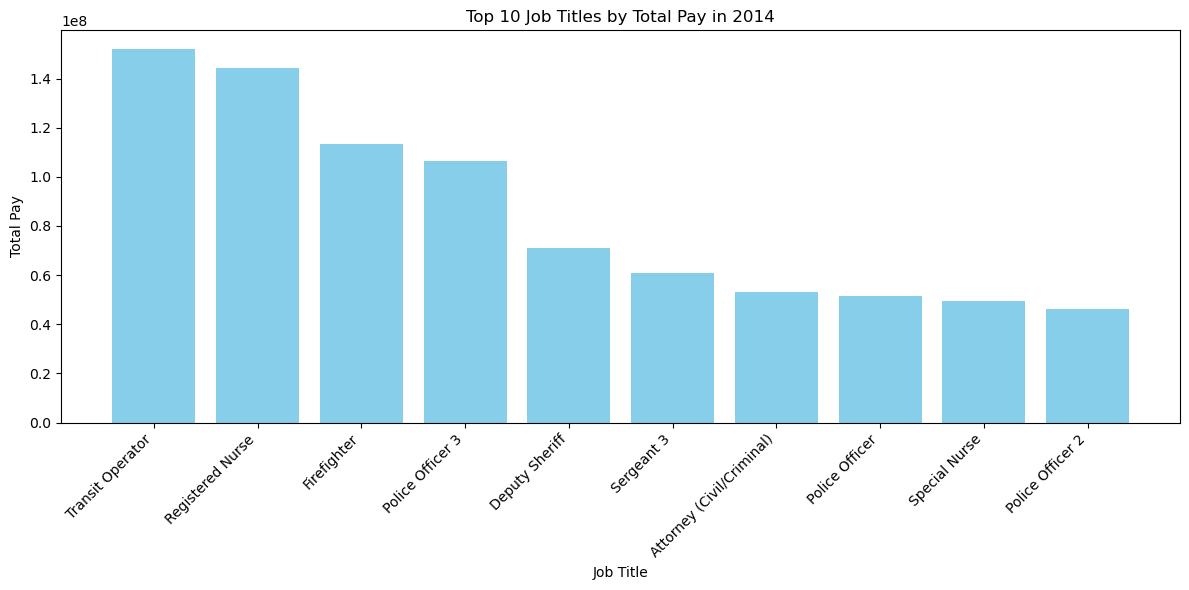

In [45]:
import matplotlib.pyplot as plt

# SQL query to get top 10 job titles by total pay in 2014
query = """
SELECT JobTitle, SUM(TotalPay) AS TotalPaySum
FROM Salaries
WHERE Year = 2014
GROUP BY JobTitle
ORDER BY TotalPaySum DESC
LIMIT 10;
"""

top_jobs_2014 = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_jobs_2014['JobTitle'], top_jobs_2014['TotalPaySum'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Job Title")
plt.ylabel("Total Pay")
plt.title("Top 10 Job Titles by Total Pay in 2014")
plt.tight_layout()
plt.show()


6. Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

In [47]:
query = """
SELECT DISTINCT JobTitle
FROM Salaries
WHERE OvertimePay > 150000
  AND JobTitle NOT IN ('Not Provided', 'not provided', 'NOT PROVIDED');
"""

high_overtime_titles = pd.read_sql_query(query, conn)
high_overtime_titles


,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"Lieutenant, Fire Suppression"
2,EMT/Paramedic/Firefighter
3,Firefighter
4,Deputy Sheriff
5,Not provided


7. Find all employees whose job titles contain the word “CHIEF”

In [49]:
query = """
SELECT EmployeeName, JobTitle, TotalPay, Year
FROM Salaries
WHERE UPPER(JobTitle) LIKE '%CHIEF%';
"""

chief_employees = pd.read_sql_query(query, conn)
chief_employees


,EmployeeName,JobTitle,TotalPay,Year
0,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",326373.19,2011
1,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,316285.74,2011
2,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",315981.05,2011
3,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",303427.55,2011
4,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.73,2011
...,...,...,...,...
622,Sharon C Jackson,Chief Deputy Adlt Probation Of,56660.18,2014
623,Anita S Lee,Chief Clerk,38598.86,2014
624,George D Vaughan,Chief Nursery Specialist,27803.37,2014
625,Patrick W Gillespie,Chief Preparator,24091.00,2014


8. Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013

In [51]:
query = """
SELECT COUNT(*) AS EmployeeCount
FROM Salaries
WHERE (JobTitle LIKE '%ENGINEER%' OR JobTitle LIKE '%Fire%')
  AND Year IN (2012, 2013);
"""

engineer_fire_count = pd.read_sql_query(query, conn)
engineer_fire_count


,EmployeeCount
0,4969


9. Distinct job titles starting with "CAPTAIN"

In [53]:
query = """
SELECT DISTINCT JobTitle
FROM Salaries
WHERE JobTitle LIKE 'CAPTAIN%';
"""

captain_titles = pd.read_sql_query(query, conn)
captain_titles


,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
2,"CAPTAIN, FIRE SUPPRESSION"
3,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
4,Captain 3
5,"Captain, Fire Suppression"
6,"Captain, Emergency Med Svcs"
7,"Captain, (Fire Department)"


10. Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

In [ ]:
query = """
SELECT EmployeeName, JobTitle, BasePay, TotalPay, Year
FROM Salaries
WHERE BasePay > 50000
  AND TotalPay < 150000
  AND LOWER(JobTitle) != 'not provided';
"""

filtered_employees = pd.read_sql_query(query, conn)
filtered_employees
